<a href="https://colab.research.google.com/github/haribharadwaj/notebooks/blob/main/BME511/SystemIdentificationMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML vs. MAP estimation for system identification

In [1]:
import numpy as np
import pylab as pl

# Setting it so figs will be a bit bigger
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 3.33]
plt.rcParams['figure.dpi']  = 120

## ML filter (same on previous active filter code)

In [2]:
from scipy import linalg
def deconvML(x, y, p):
    A = linalg.toeplitz(x[(p-1):], x[:p][::-1])
    ysub = y[(p-1):]
    h = np.dot(linalg.pinv(A), ysub)
    return h

## Simulated test scenario

### Impulse response

(0.0, 0.4)

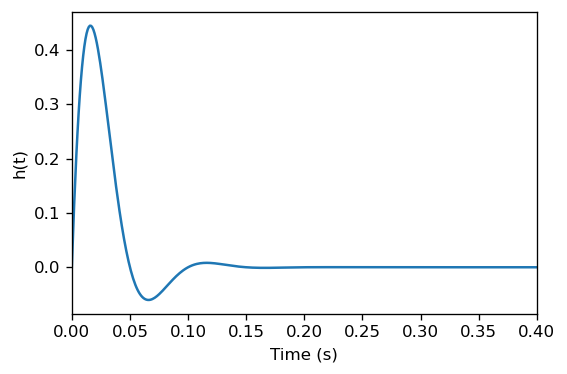

In [3]:
fs = 1024
t = np.arange(0, 2, 1./fs)

f = 10;
tau = 0.25/f;

h = np.sin(2 * np.pi * f * t) * np.exp(-t/tau)
pl.plot(t, h);
pl.xlabel('Time (s)')
pl.ylabel('h(t)')
pl.xlim([0, 0.4])

### Create some inputs and outputs

Text(0, 0.5, 'y(t)')

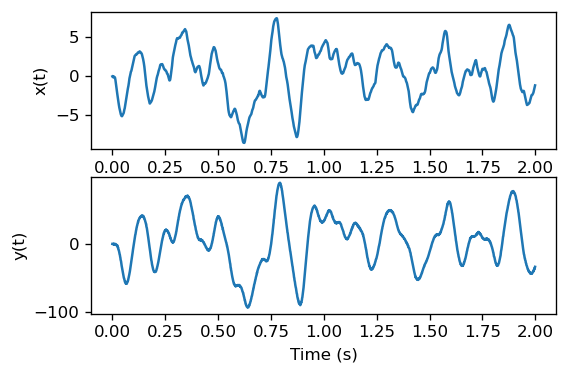

In [4]:
from scipy import signal
f2 = 5
tau2 = 0.25 / f2
h2 = np.sin(2 * np.pi * f2 * t) * np.exp(-t/tau2)
x = signal.lfilter(h2, 1, np.random.randn(t.shape[0]))

SNR = 100
y_temp = signal.lfilter(h, 1, x)
sigma_n = np.sqrt((y_temp ** 2).mean()) / SNR
y = y_temp + np.random.randn(t.shape[0]) * sigma_n

pl.subplot(211)
pl.plot(t, x)
pl.ylabel('x(t)')
pl.subplot(212)
pl.plot(t, y)
pl.xlabel('Time (s)')
pl.ylabel('y(t)')

(0.0, 0.4)

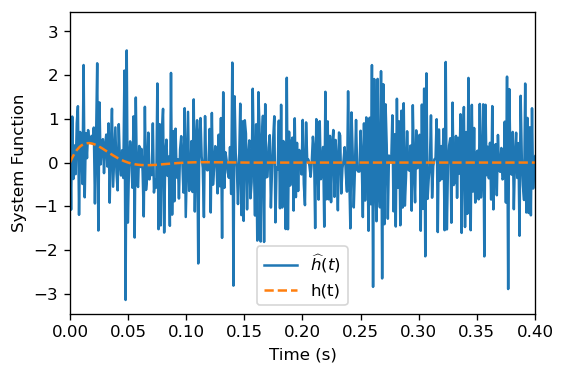

In [5]:
p = 500
hhat = deconvML(x, y, p)
tplot = np.arange(p) / fs
pl.plot(tplot, hhat)
pl.plot(tplot, h[:tplot.shape[0]], '--')

pl.xlabel('Time (s)')
pl.ylabel('System Function')
pl.legend(('$\widehat{h}(t)$', 'h(t)'))
pl.xlim([0, 0.4])

## MAP filter estimate

In [6]:
def deconvMAP(x, y, p, lam):
    A = linalg.toeplitz(x[(p-1):], x[:p][::-1])
    ysub = y[(p-1):]
    B = np.dot(A.T, A) + lam * np.eye(p)
    h = np.dot(np.dot(linalg.inv(B), A.T), ysub)
    return h

(0.0, 0.4)

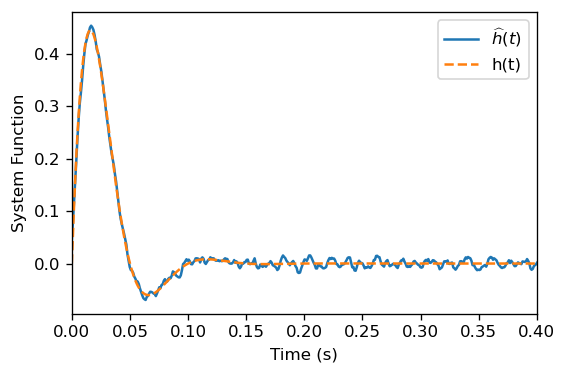

In [7]:
p = 500
lam = 100  # Hyperparameter
hhat = deconvMAP(x, y, p, lam)
tplot = np.arange(p) / fs
pl.plot(tplot, hhat)
pl.plot(tplot, h[:tplot.shape[0]], '--')

pl.xlabel('Time (s)')
pl.ylabel('System Function')
pl.legend(('$\widehat{h}(t)$', 'h(t)'))
pl.xlim([0, 0.4])

## L-curve for choosing hyperparameter(s): Bias-variance tradeoff in action

Text(0, 0.5, 'Squared-error of the fitted solution')

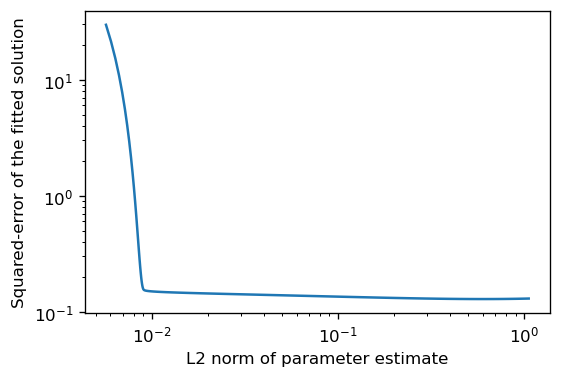

In [8]:
lams = 10. ** np.arange(-5, 5, 0.1)

fit_error = np.zeros(lams.shape)
h_norm = np.zeros(lams.shape)

for k, lam in enumerate(lams):
    hhat = deconvMAP(x, y, p, lam)
    y_fitted = signal.lfilter(hhat, 1, x)
    fit_error[k] = ((y - y_fitted) ** 2.).mean()
    h_norm[k] = (hhat ** 2.).mean()

pl.loglog(h_norm, fit_error)
pl.xlabel('L2 norm of parameter estimate')
pl.ylabel('Squared-error of the fitted solution')

Text(0, 0.5, '$lambda$')

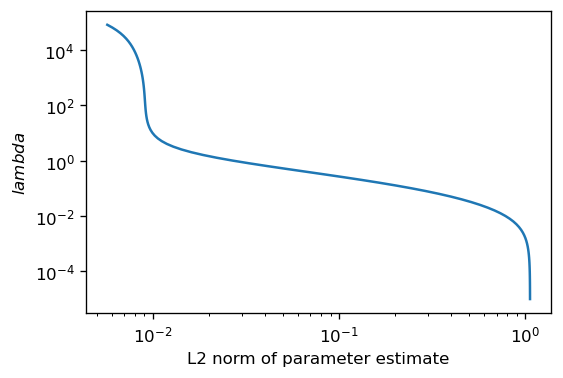

In [9]:
pl.loglog(h_norm, lams)
pl.xlabel('L2 norm of parameter estimate')
pl.ylabel('$lambda$')